In [99]:
import json as js
import glob
import sys

In [100]:
import pandas as pd
import numpy as np

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction import text 
from sklearn.cluster import KMeans, MiniBatchKMeans

In [102]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

In [103]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

In [104]:
import os
from copy import deepcopy
import time
import datetime

In [105]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/g/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [106]:
additional_stop_words = ['rt','t','http','u','s','follow','m','dm'] ##USE THIS FOR STOP WORDS
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [107]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in tokenizer.tokenize(doc)]

In [108]:
directory = './data/*'

In [109]:
#directory = './../../demo-project/tweets/*'

## LOAD TWEET OBJECTS

In [110]:
tweet_objects = []
dirs = glob.glob(directory)
for dr in dirs:
    files = glob.glob(dr+'/*')
    for f in files:
            fin = open(f,'r')
            for line in fin:
                try:
                    dat = js.loads(line)
                    tweet_objects.append(dat)
                except:
                    continue
            fin.close()

## EXTRACT DATA AND EXPORT TO TEMPORARY FILE

In [111]:
fout = open('tmp.dat','w')
for ln in tweet_objects:
    try:
        entities = ln['entities']
        hashtags = entities['hashtags']
        user_mentions = entities['user_mentions']
    except KeyError:
        continue
    for hashtag in hashtags:
        try:
            hashtag = hashtag['text']
            date = ln['created_at']
            date = date.split()
            #print date
            date = str(date[1])+'-'+str(date[2])+'18_'+str(date[3])
            favorite_count = ln['favorite_count']
            user = ln['user']
            followers = user['followers_count']
            username = user['screen_name']
            location = user['location']
            txt = ln['text'].replace('\n','')
            fout.write(date + '\t' + str(favorite_count)+','+str(followers)+',"'+str(username)+'","'+str(location)+'","'+str(txt)+'"\n')
        except UnicodeEncodeError:#.encode('utf-8')
            continue
fout.close()

## OPEN TMP FILE AS DATAFRAME

In [112]:
df = pd.read_csv('tmp.dat',error_bad_lines=False,header=None,names=\
                 ['date','followers','username','location','tweet'],\
                 delimiter=',',index_col=False)#,encoding='latin_1')
df.shape[0]
df.drop_duplicates(inplace=True)

In [113]:
#if rm_duplicates == False:
#    df['rt'] = df['tweet'].str.split(':', expand=True).ix[:,0]
#    df.drop_duplicates(subset=['rt'], keep='first',inplace=True)
#    df.rt.head()
#    df.shape[0]

In [114]:
df.shape[0]

17421

In [115]:
df.head(10)

,date,followers,username,location,tweet
0,Sep-1318_05:15:47\t0,2670,drhiot,"Newport Beach, CA",RT @HeinzVHoenen: #AI #MachineLearningMore tha...
2,Sep-1318_06:40:20\t0,7430,Harry_Robots,"Renton, WA",Xbox One S vs PS4 Pro: Which is better?: #Deep...
5,Sep-1318_13:22:26\t0,15265,SavarjeetSingh2,India,RT @Abhaykumar422: Retrain #Azure #MachineLear...
7,Sep-1218_03:00:10\t0,630,geekFreak75,None,RT @JeffreyBuskey: If artificial intelligence ...
8,Sep-1218_14:25:20\t0,3257,machinelearn_d,The Earth,RT @FDleaders: Will the increasing prominence ...
12,Sep-1218_23:05:15\t0,8723,nschaetti,"Nyon, Suisse",#MachineLearning algorithms used to find radio...
15,Sep-1318_01:44:44\t0,1438,business_savyy,None,RT @ahmedjr_16: 18 Best #ArtificialIntelligenc...
19,Sep-1318_03:47:34\t0,585,rottamotta,None,RT @Fisher85M: Updated Technology Timeline to ...
27,Sep-1318_15:30:29\t0,583,linked_do,"Berlin, Germany",RT @Connected_Data: Join our partner @GOTOber ...
30,Sep-1218_02:25:28\t0,3246,machinelearn_d,The Earth,RT @BigDataCXO: An important topic and one clo...


In [116]:
df.iloc[0].tweet

'RT @HeinzVHoenen: #AI #MachineLearningMore than 2000 developers surveyed to find out the perspective of AI, ML https://t.co/cW39L8jfiV v…'

## REMOVING TWEETS FROM DATASET

In [117]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Certain words can be used in order to filter such tweets.
*** Enter these words below in the bad_terms list.
'''
bad_terms = ['cock','ManiKENniMonica','nudes']
for i in range(len(bad_terms)):
    df.bad = df['tweet'].str.lower().str.contains(bad_terms[i].lower())
    df = df[df.bad == False]

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


## REMOVE RETWEETS

In [118]:
rm_duplicates = False
if rm_duplicates == False:
    df['rt'] = df['tweet'].str.split(':', expand=True).ix[:,0]
    df.drop_duplicates(subset=['rt'], keep='first',inplace=True)
    df.rt.head()
    df.shape[0]

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [119]:
df.shape[0]

7806

## TOPIC MODELING WITH LATENT DIRICHLET ALLOCATION

In [135]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [136]:
additional_stop_words = ['amp','gt','rt','t','http','u','s','follow','m','dm','v'] ##USE THIS FOR STOP WORDS
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [137]:
n_features = 300
n_topics = 5
n_top_words = 10
n_top_tweets = 15
ngrams = 3

In [138]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=5,max_features=n_features,stop_words=stop_words,\
                                  ngram_range=(1,ngrams),tokenizer=LemmaTokenizer())
countv = count_vectorizer.fit_transform(df.tweet)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [139]:
lda = LatentDirichletAllocation(n_topics, random_state=0,max_iter=30).fit(countv)

In [140]:
count_feature_names = count_vectorizer.get_feature_names()

In [141]:
lda_embedding = lda.transform(countv)
lda_embedding = (lda_embedding - lda_embedding.mean(axis=0))/lda_embedding.std(axis=0)

In [142]:
top_idx = np.argsort(lda_embedding,axis=0)[-n_top_tweets:]
count = 0
for i, idxs in enumerate(top_idx.T): 
    print("Topic {}:".format(count+1))
    topic = lda.components_[i]
    print(" ".join([str(count_feature_names[i])+'\n' for i in topic.argsort()[:-n_top_words - 1:-1]]))
    for idx in idxs:
        print(df.iloc[idx]['tweet'])
    count += 1
    print('\n\n')

Topic 1:
machinelearning
 ai
 ai machinelearning
 ml
 latest
 machinelearning ai
 bigdata
 thanks
 daily
 use

The latest The IT&amp;Design Daily! https://t.co/A5ZWXaKo5u Thanks to @jrobertson @darrenspink @cyclingslopes #ai #machinelearning
The latest The Tonex training Daily! https://t.co/rJiLOxGvAz Thanks to @prokopsky @MarryMerulin @SomaliaNews24 #bigdata #machinelearning
The latest Vakul's Tech Daily! https://t.co/7dppjw2tuz Thanks to @chintan4u @evankirstel @dbottjer #ai #machinelearning
The latest AI News Update! https://t.co/fukw9QeIef Thanks to @KryptoGraphe #ai #machinelearning
The latest eXploration of Space and AI News! https://t.co/hZwVPzenbd Thanks to @LE_Schlatter @MorganBalducci @SFMagus #ai #machinelearning
The latest The #AI #Chatbot Daily! https://t.co/CxtvwFocqG Thanks to @rustd @MrCoolLooking75 @ozalladavid #ai #machinelearning
The latest The PATT Foundation Daily News! https://t.co/t0bJHx9206 Thanks to @egirrrlie @zanesloanbc @KathMorrow90 #bigdata #machinelearnin

## T-SNE Visualization

In [164]:
topics = [i+1 for i in range(n_topics)]
topics = ['New Nike ad campaign','Ad campaign','Boycott & other']

In [165]:
tsne = TSNE(random_state=0,metric='cosine',init='pca',perplexity=100.0,n_iter=5000) #TODO: TRY DIFFERENT DISTANCE METRICS!!
tsne_embedding = tsne.fit_transform(lda_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])
tsne_embedding['hue'] = lda_embedding.argmax(axis=1)

In [166]:
cmap = matplotlib.cm.get_cmap('nipy_spectral_r')

In [167]:
colors = []
for i in range(n_topics):
    val = (float(i))/(n_topics-1)
    colors.append(cmap(val))

In [168]:
legend_list = []
for i in range((n_topics)):   
    color = colors[i]
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

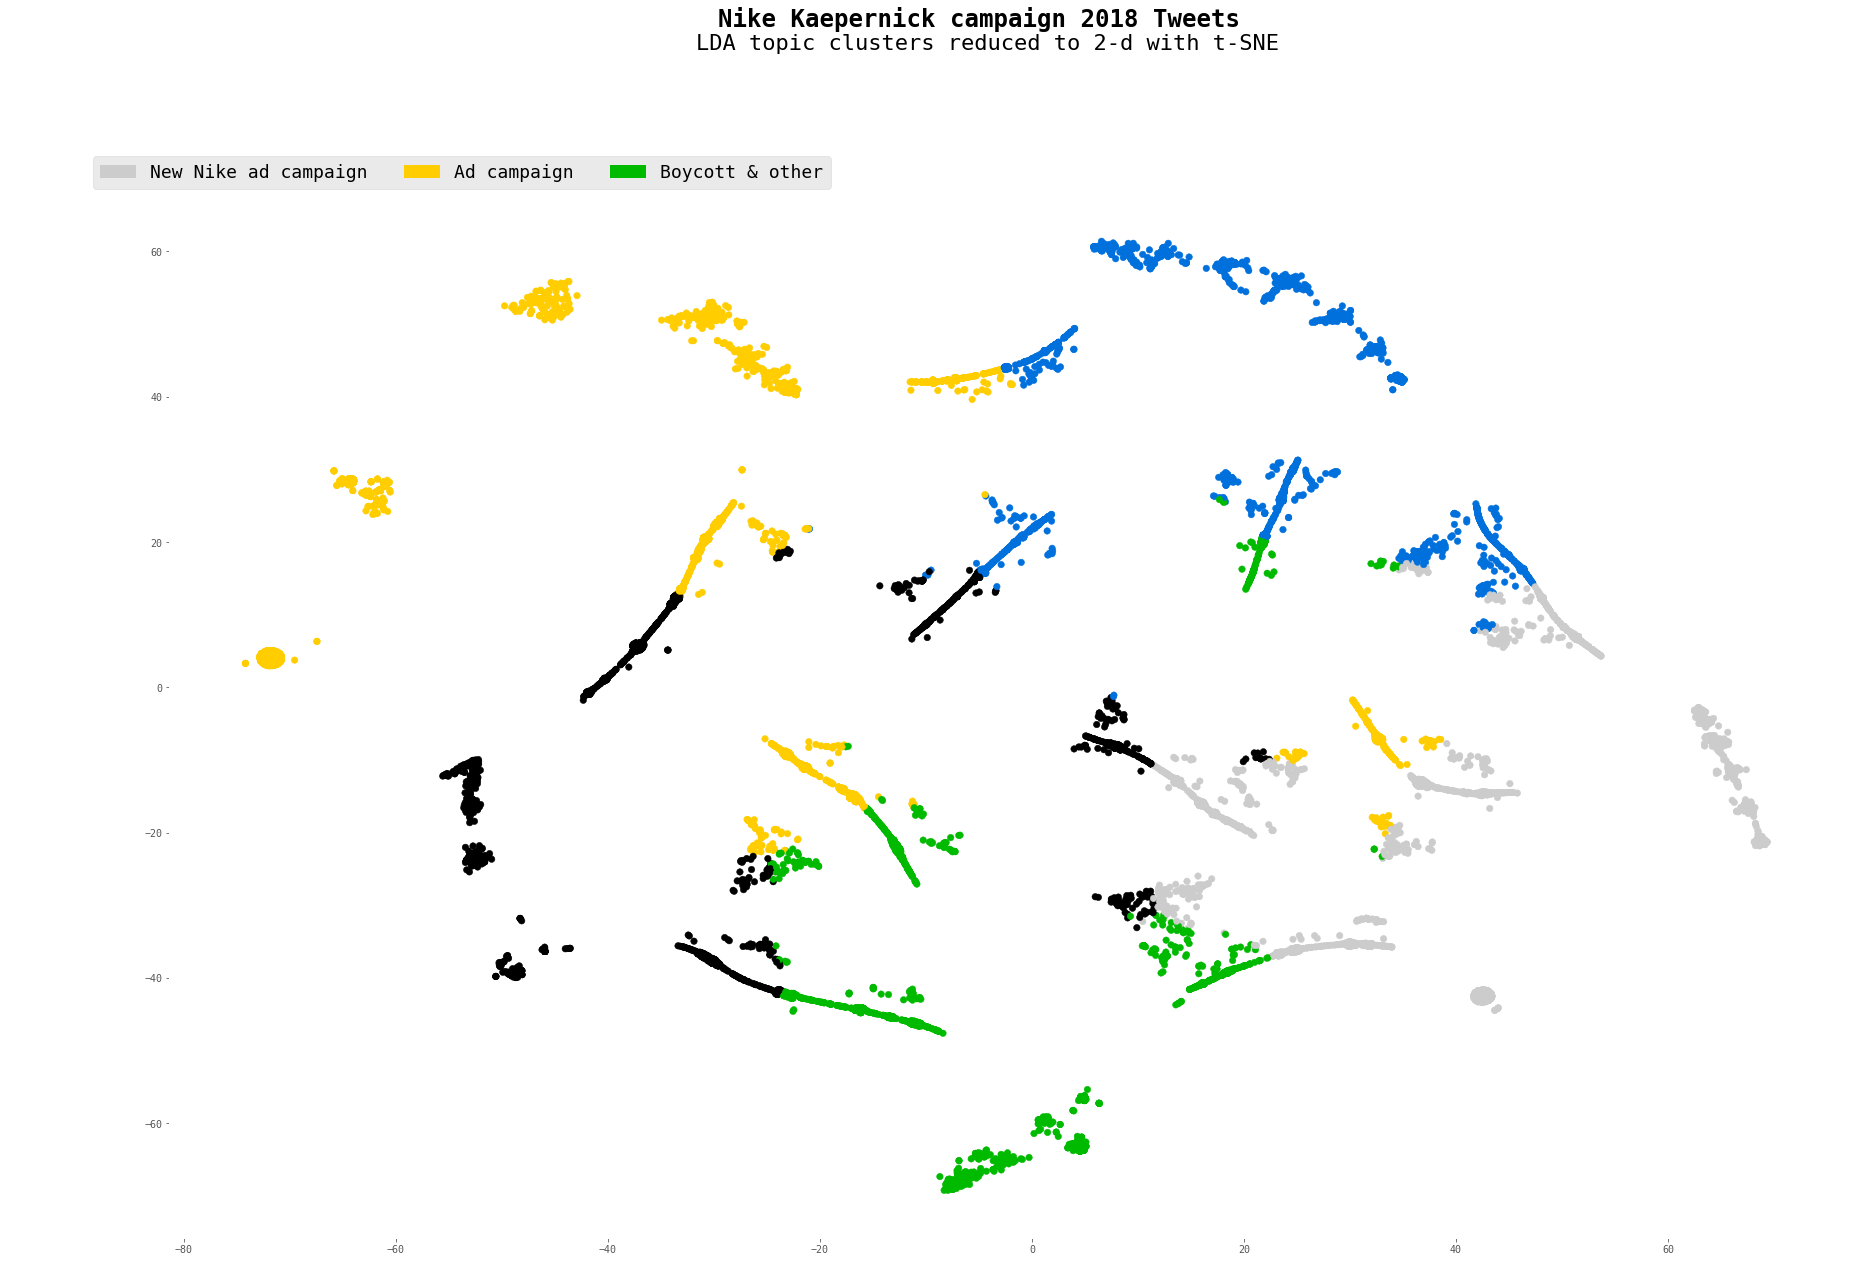

In [169]:
matplotlib.rc('font',family='monospace')
plt.style.use('ggplot')
fig, axs = plt.subplots(1,1, figsize=(30, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)
axs.set_facecolor('white')
count = 0
legend = []
data = tsne_embedding
scatter = axs.scatter(data=data,x='x',y='y',s=42,c=data['hue'],cmap='nipy_spectral_r')
plt.suptitle("Nike Kaepernick campaign 2018 Tweets",**{'fontsize':'24','weight':'bold'},ha='center')
plt.figtext(.51,0.95,'LDA topic clusters reduced to 2-d with t-SNE  ', **{'fontsize':'22','weight':'light'}, ha='center')
fig.legend(legend_list,topics,loc=(0.05,0.85),ncol=3,fontsize=18)
plt.subplots_adjust(top=0.85)
plt.show()
#plt.savefig() #enter filename here to save vizualization to file

([<matplotlib.axis.XTick at 0x145f4fd68>,
 <a list of 3 Text xticklabel objects>)

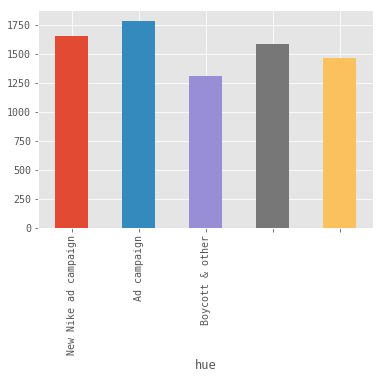

In [170]:
freq = tsne_embedding.groupby('hue').count()
fig, ax = plt.subplots()
indices = [i for i in range(n_topics)]
freq['x'].plot(ax=ax, kind='bar')
plt.xticks(indices, topics)
#plt.savefig('../../ml_lda_clusters_10freq.png',transparent=True)